In [1]:
import emcee
import matplotlib.pyplot as plt
import numpy as np
import corner

np.random.seed(1)

## MCMC Sampling and fitting of  Gaussian  data.

Produce some data form a nomral distribution x and fit $\mu$ and $\sigma$ using MCMC sampling.
Below is the log-likelihood function of the gaussian with terms constant in $\sigma$ and $\mu$ omitted.

In [2]:
def log_prob(p0, x):
    mu, sigma = p0
    N = len(x)

    if sigma < 0 or sigma > 10:
        return -np.inf
    if mu < -10 or mu > 10:
        return -np.inf
    
    return - N * np.log(sigma) -0.5*np.sum((x - mu)**2/sigma**2)

Pull N randomly sampled data points from a  Gaussian and initialize walkers for $\mu$ and $\sigma$ randomly 

In [3]:
N = 5000

true_loc = 0
true_scale = 0.5
nwalkers = 1500
ndim = 2 

x = np.random.normal(loc=true_loc, scale=true_scale, size=N)

p_mu = np.random.uniform(-1, 1, size=nwalkers) 
p_sigma = np.random.uniform(0, 1, size=nwalkers) 
p0 = np.vstack([p_mu, p_sigma]).T
p0.shape

(1500, 2)

The plot below shows the marginal distributions of the parameter space. Which is for now uniformly initialized.
This will hopefully change when we run a few steps of MCMC simulation.

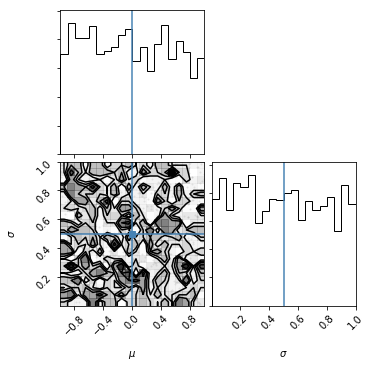

In [9]:
corner.corner(p0, labels=['$\mu$', '$\sigma$'], truths=[true_loc, true_scale])

In [7]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob, args=[x])
pos, prob, state = sampler.run_mcmc(p0, 50)
sampler.reset()
sampler.run_mcmc(pos, 200);
samples  = sampler.flatchain

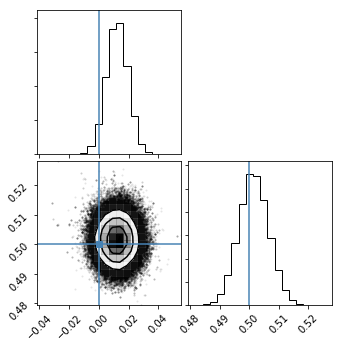

In [8]:
corner.corner(samples, truths=[true_loc, true_scale],)